In [827]:
import pandas as pd
import numpy as np

df = pd.read_csv('survey_results_public.csv')

In [828]:
df.shape


(83439, 48)

In [829]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [830]:
df2 = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly','Gender', 'Sexuality','Ethnicity']]

df2 = df2.rename({'ConvertedCompYearly' : 'Salary'}, axis = 1)

df2.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Gender,Sexuality,Ethnicity
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0,Man,Straight / Heterosexual,White or of European descent
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN,Man,Straight / Heterosexual,White or of European descent
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN,Man,Prefer not to say,Prefer not to say
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN,Man,Straight / Heterosexual,White or of European descent
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN,Man,NaN,White or of European descent


In [831]:
df2.isnull().sum()

Country             0
EdLevel           313
YearsCodePro    22223
Employment        116
Salary          36595
Gender           1153
Sexuality       10073
Ethnicity        3975
dtype: int64

In [832]:
df2 = df2[df2['Salary'].notnull()]
df2.isnull().sum()

Country            0
EdLevel           21
YearsCodePro     453
Employment        13
Salary             0
Gender           175
Sexuality       3469
Ethnicity        901
dtype: int64

In [833]:
df2.shape

(46844, 8)

In [834]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
 5   Gender        46669 non-null  object 
 6   Sexuality     43375 non-null  object 
 7   Ethnicity     45943 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.2+ MB


In [835]:
df2 = df2.dropna()
df2.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
Gender          0
Sexuality       0
Ethnicity       0
dtype: int64

In [836]:
df2.shape

(42680, 8)

In [837]:
df2['Country'].value_counts()

United States of America                                9202
India                                                   3182
Germany                                                 2985
United Kingdom of Great Britain and Northern Ireland    2803
Canada                                                  1590
                                                        ... 
Somalia                                                    1
Burundi                                                    1
North Korea                                                1
Saint Lucia                                                1
Burkina Faso                                               1
Name: Country, Length: 170, dtype: int64

In [838]:
def country_clean(names, total):
    country_map = {}
    for i in range(len(names)):
        if names.values[i] >= total:
            country_map[names.index[i]] = names.index[i]
        else:
            country_map[names.index[i]] = 'Other Countries'
    return country_map


In [839]:
final_country_map = country_clean(df2.Country.value_counts(), 150)
df2['Country'] = df2['Country'].map(final_country_map)
df2['Country'].value_counts()

United States of America                                9202
Other Countries                                         3725
India                                                   3182
Germany                                                 2985
United Kingdom of Great Britain and Northern Ireland    2803
Canada                                                  1590
Brazil                                                  1495
France                                                  1489
Poland                                                  1050
Netherlands                                              987
Spain                                                    976
Australia                                                869
Italy                                                    843
Russian Federation                                       817
Sweden                                                   765
Switzerland                                              507
Turkey                  

In [840]:
df2['Salary'].unique()

array([  51552.,   46482.,   77290., ..., 4300000.,  160500.,  816816.])

In [841]:
df2.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Gender,Sexuality,Ethnicity
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0,Man,Straight / Heterosexual,White or of European descent
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0,Man,Straight / Heterosexual,White or of European descent;Hispanic or Latin...
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0,Man,Straight / Heterosexual,White or of European descent
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0,Man,Straight / Heterosexual,White or of European descent
18,Other Countries,"Other doctoral degree (Ph.D., Ed.D., etc.)",30,I prefer not to say,160932.0,Man,Straight / Heterosexual,White or of European descent


In [842]:
df2 = df2[df2['Salary'] <= 340000]
df2 = df2[df2['Salary'] > 10006]
df2 = df2[df2['Salary'] != 'Other']
df2.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Gender,Sexuality,Ethnicity
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0,Man,Straight / Heterosexual,White or of European descent
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0,Man,Straight / Heterosexual,White or of European descent;Hispanic or Latin...
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0,Man,Straight / Heterosexual,White or of European descent
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0,Man,Straight / Heterosexual,White or of European descent
18,Other Countries,"Other doctoral degree (Ph.D., Ed.D., etc.)",30,I prefer not to say,160932.0,Man,Straight / Heterosexual,White or of European descent


In [843]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37696 entries, 9 to 83438
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37696 non-null  object 
 1   EdLevel       37696 non-null  object 
 2   YearsCodePro  37696 non-null  object 
 3   Employment    37696 non-null  object 
 4   Salary        37696 non-null  float64
 5   Gender        37696 non-null  object 
 6   Sexuality     37696 non-null  object 
 7   Ethnicity     37696 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.6+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'Sweden'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Other Countries'),
  Text(5, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(6, 0, 'Russian Federation'),
  Text(7, 0, 'Israel'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Ukraine'),
  Text(10, 0, 'United States of America'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Brazil'),
  Text(13, 0, 'Bulgaria'),
  Text(14, 0, 'Greece'),
  Text(15, 0, 'Italy'),
  Text(16, 0, 'Netherlands'),
  Text(17, 0, 'Poland'),
  Text(18, 0, 'Switzerland'),
  Text(19, 0, 'Hungary'),
  Text(20, 0, 'Bangladesh'),
  Text(21, 0, 'Romania'),
  Text(22, 0, 'Sri Lanka'),
  Text(23, 0, 'Croatia'),
  Text(24, 0, 'Denmark'),
  Text(25, 0, 'Ireland'),
  Text(26, 0, 'Colombia'),
  Text(27,

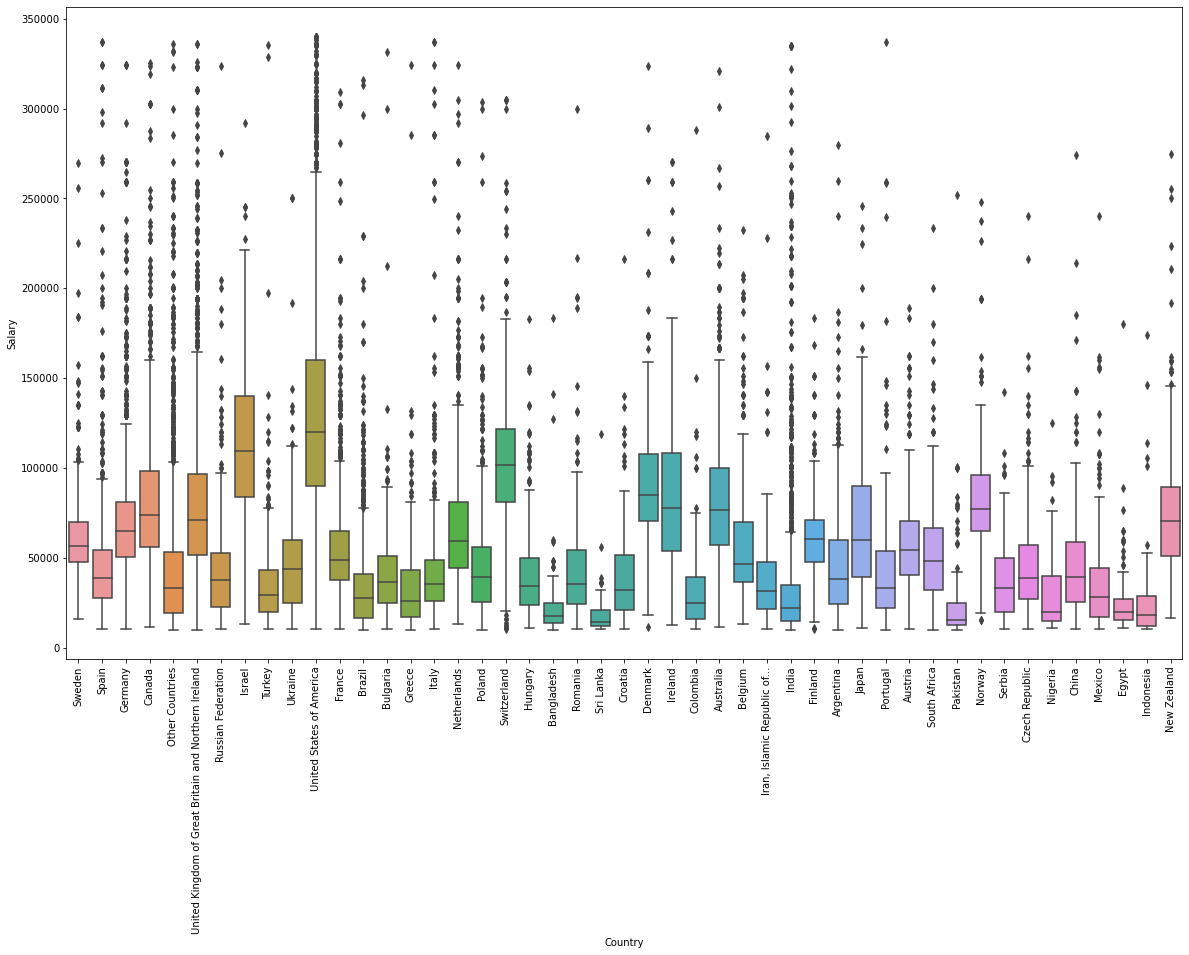

In [844]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,12))
sns.boxplot(x = df2['Country'], y = df2['Salary'])
plt.xticks(rotation = 90)

In [845]:
df2.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Gender,Sexuality,Ethnicity
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0,Man,Straight / Heterosexual,White or of European descent
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0,Man,Straight / Heterosexual,White or of European descent;Hispanic or Latin...
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0,Man,Straight / Heterosexual,White or of European descent
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0,Man,Straight / Heterosexual,White or of European descent
18,Other Countries,"Other doctoral degree (Ph.D., Ed.D., etc.)",30,I prefer not to say,160932.0,Man,Straight / Heterosexual,White or of European descent


In [846]:
df2.Employment.unique()

array(['Employed full-time', 'I prefer not to say', 'Employed part-time',
       'Independent contractor, freelancer, or self-employed', 'Retired'],
      dtype=object)

In [847]:
df2.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [848]:
def clean_edlevel(x):
        if "Master’s degree" in x:
            return "Master's"
        if "Bachelor’s degree" in x:
            return "Bachelor’s"
        if "doctoral" in x or "Professional" in x:
            return "Professional"
        else:
            return "No Degree"
df2['EdLevel'] = df2['EdLevel'].apply(clean_edlevel)

In [849]:
df2.EdLevel.unique()

array(["Master's", 'Bachelor’s', 'Professional', 'No Degree'],
      dtype=object)

In [850]:
df2.Employment.unique()

array(['Employed full-time', 'I prefer not to say', 'Employed part-time',
       'Independent contractor, freelancer, or self-employed', 'Retired'],
      dtype=object)

In [851]:
def clean_employment(x):
        if "Independent contractor" in x:
            return "Freelancer"
        if "Employed full-time" in x:
            return "Full Time Employee"
        if "I prefer not to say" in x:
            return "Not willing to share"
        if "Employed part-time" in x:
            return "Part Time Employee"
        if "Independent contractor" in x:
            return "Contract Employee"
        if "Retired" in x:
            return "Retired Employee"
df2['Employment'] = df2['Employment'].apply(clean_employment)

In [852]:
df2.Employment.unique()

array(['Full Time Employee', 'Not willing to share', 'Part Time Employee',
       'Freelancer', 'Retired Employee'], dtype=object)

In [853]:
df2.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Gender,Sexuality,Ethnicity
9,Sweden,Master's,4,Full Time Employee,51552.0,Man,Straight / Heterosexual,White or of European descent
11,Spain,Bachelor’s,5,Full Time Employee,46482.0,Man,Straight / Heterosexual,White or of European descent;Hispanic or Latin...
12,Germany,Master's,6,Full Time Employee,77290.0,Man,Straight / Heterosexual,White or of European descent
17,Canada,Bachelor’s,6,Full Time Employee,46135.0,Man,Straight / Heterosexual,White or of European descent
18,Other Countries,Professional,30,Not willing to share,160932.0,Man,Straight / Heterosexual,White or of European descent


In [854]:
df2.YearsCodePro.unique()

array(['4', '5', '6', '30', '18', '21', '16', '2', '10',
       'Less than 1 year', '15', '3', '1', '12', '8', '7', '17', '14',
       '26', '34', '11', '25', '24', '22', '13', '9', '20', '31', '23',
       '39', '27', '19', '35', '33', 'More than 50 years', '37', '43',
       '40', '29', '38', '32', '42', '28', '46', '36', '44', '45', '41',
       '50', '47', '49', '48'], dtype=object)

In [855]:
def clean_years_code(x):
        if "Less than 1 year" in x:
            return 0.5
        if 'More than 50 years' in x:
            return 50
        return float(x)

df2['YearsCodePro'] = df2['YearsCodePro'].apply(clean_years_code)

In [856]:
df2.YearsCodePro.unique()

array([ 4. ,  5. ,  6. , 30. , 18. , 21. , 16. ,  2. , 10. ,  0.5, 15. ,
        3. ,  1. , 12. ,  8. ,  7. , 17. , 14. , 26. , 34. , 11. , 25. ,
       24. , 22. , 13. ,  9. , 20. , 31. , 23. , 39. , 27. , 19. , 35. ,
       33. , 50. , 37. , 43. , 40. , 29. , 38. , 32. , 42. , 28. , 46. ,
       36. , 44. , 45. , 41. , 47. , 49. , 48. ])

In [857]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37696 entries, 9 to 83438
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37696 non-null  object 
 1   EdLevel       37696 non-null  object 
 2   YearsCodePro  37696 non-null  float64
 3   Employment    37696 non-null  object 
 4   Salary        37696 non-null  float64
 5   Gender        37696 non-null  object 
 6   Sexuality     37696 non-null  object 
 7   Ethnicity     37696 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.8+ MB


In [858]:
def clean_sexuality(x):
        if x == 'Straight / Heterosexual':
            return "Straight"
        if x == 'Prefer to self-describe:':
            return "Prefer to self-describe"
        else:
            return "LGBTQ"
df2['Sexuality'] = df2['Sexuality'].apply(clean_sexuality)

In [859]:
def clean_gender(x):
        if 'Man' in x:
            return "Man"
        if 'Woman' in x:
            return 'Woman'
        else:
            return "Unidentified / Not Disclosing"
df2['Gender'] = df2['Gender'].apply(clean_gender)

In [860]:
df2

,Country,EdLevel,YearsCodePro,Employment,Salary,Gender,Sexuality,Ethnicity
9,Sweden,Master's,4.0,Full Time Employee,51552.0,Man,Straight,White or of European descent
11,Spain,Bachelor’s,5.0,Full Time Employee,46482.0,Man,Straight,White or of European descent;Hispanic or Latin...
12,Germany,Master's,6.0,Full Time Employee,77290.0,Man,Straight,White or of European descent
17,Canada,Bachelor’s,6.0,Full Time Employee,46135.0,Man,Straight,White or of European descent
18,Other Countries,Professional,30.0,Not willing to share,160932.0,Man,Straight,White or of European descent
...,...,...,...,...,...,...,...,...
83431,Pakistan,Bachelor’s,4.0,Freelancer,11676.0,Man,Straight,Southeast Asian
83432,Canada,Bachelor’s,0.5,Full Time Employee,80169.0,Woman,Straight,East Asian
83433,Brazil,Bachelor’s,11.0,Freelancer,18326.0,Man,Straight,Hispanic or Latino/a/x
83434,United States of America,Bachelor’s,5.0,Full Time Employee,160500.0,Man,Straight,White or of European descent


In [861]:
from sklearn.preprocessing import LabelEncoder

#cleaning Country

le_country = LabelEncoder()

df2['Country'] = le_country.fit_transform(df2['Country'])

#cleaning edlevel

le_edlevel = LabelEncoder()

df2['EdLevel'] = le_edlevel.fit_transform(df2['EdLevel'])

In [862]:
df2

,Country,EdLevel,YearsCodePro,Employment,Salary,Gender,Sexuality,Ethnicity
9,41,1,4.0,Full Time Employee,51552.0,Man,Straight,White or of European descent
11,39,0,5.0,Full Time Employee,46482.0,Man,Straight,White or of European descent;Hispanic or Latin...
12,16,1,6.0,Full Time Employee,77290.0,Man,Straight,White or of European descent
17,7,0,6.0,Full Time Employee,46135.0,Man,Straight,White or of European descent
18,31,3,30.0,Not willing to share,160932.0,Man,Straight,White or of European descent
...,...,...,...,...,...,...,...,...
83431,32,0,4.0,Freelancer,11676.0,Man,Straight,Southeast Asian
83432,7,0,0.5,Full Time Employee,80169.0,Woman,Straight,East Asian
83433,5,0,11.0,Freelancer,18326.0,Man,Straight,Hispanic or Latino/a/x
83434,46,0,5.0,Full Time Employee,160500.0,Man,Straight,White or of European descent


In [863]:

#cleaning sexuality

le_sexuality = LabelEncoder()

df2['Sexuality'] = le_sexuality.fit_transform(df2['Sexuality'])

#cleaning gender

le_gender = LabelEncoder()

df2['Gender'] = le_gender.fit_transform(df2['Gender'])

df2


,Country,EdLevel,YearsCodePro,Employment,Salary,Gender,Sexuality,Ethnicity
9,41,1,4.0,Full Time Employee,51552.0,0,2,White or of European descent
11,39,0,5.0,Full Time Employee,46482.0,0,2,White or of European descent;Hispanic or Latin...
12,16,1,6.0,Full Time Employee,77290.0,0,2,White or of European descent
17,7,0,6.0,Full Time Employee,46135.0,0,2,White or of European descent
18,31,3,30.0,Not willing to share,160932.0,0,2,White or of European descent
...,...,...,...,...,...,...,...,...
83431,32,0,4.0,Freelancer,11676.0,0,2,Southeast Asian
83432,7,0,0.5,Full Time Employee,80169.0,2,2,East Asian
83433,5,0,11.0,Freelancer,18326.0,0,2,Hispanic or Latino/a/x
83434,46,0,5.0,Full Time Employee,160500.0,0,2,White or of European descent


In [864]:
#cleaning emplyoment

le_employment = LabelEncoder()

df2['Employment'] = le_employment.fit_transform(df2['Employment'])

In [865]:
df2.Sexuality.unique()

array([2, 1, 0])

In [866]:
df2.Sexuality.unique()

array([2, 1, 0])

In [867]:
df2 = df2.drop(['Ethnicity'], axis = 1)

In [868]:
df2.Gender.unique()

array([0, 2, 1])

In [869]:
df2

,Country,EdLevel,YearsCodePro,Employment,Salary,Gender,Sexuality
9,41,1,4.0,1,51552.0,0,2
11,39,0,5.0,1,46482.0,0,2
12,16,1,6.0,1,77290.0,0,2
17,7,0,6.0,1,46135.0,0,2
18,31,3,30.0,2,160932.0,0,2
...,...,...,...,...,...,...,...
83431,32,0,4.0,0,11676.0,0,2
83432,7,0,0.5,1,80169.0,2,2
83433,5,0,11.0,0,18326.0,0,2
83434,46,0,5.0,1,160500.0,0,2


<AxesSubplot:>

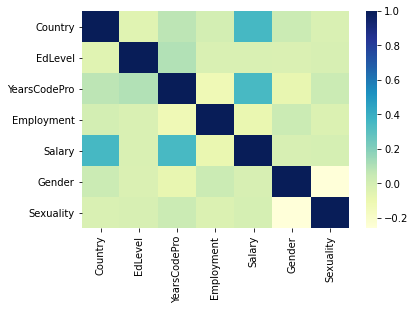

In [870]:
corr = df2.corr()
sns.heatmap(corr, cmap = 'YlGnBu')

In [871]:
X = df2.drop('Salary', axis = 1)
y = df2['Salary']

In [872]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X,y.values)
y_pred = lr.predict(X)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_square_error_lr = np.sqrt(mean_squared_error(y,y_pred))
mean_absolute_error_lr = mean_absolute_error(y,y_pred)

print('Mean Square Error in Linear Regression:', mean_square_error_lr)
print('Mean Absolute Error in Linear Regression:', mean_absolute_error_lr)


Mean Square Error in Linear Regression: 47502.90680030147
Mean Absolute Error in Linear Regression: 35087.742118821436


In [873]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X,y.values)
y_pred = dtr.predict(X)

mean_square_error_dtr = np.sqrt(mean_squared_error(y,y_pred))
mean_absolute_error_dtr = mean_absolute_error(y,y_pred)

print('Mean Square Error in Decision Tree Regressor:', mean_square_error_dtr)
print('Mean Absolute Error in Decision Tree Regressor:', mean_absolute_error_dtr)

Mean Square Error in Decision Tree Regressor: 32319.338759953043
Mean Absolute Error in Decision Tree Regressor: 19371.721848168967


In [874]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X,y.values)
y_pred = rfr.predict(X)

mean_square_error_rfr = np.sqrt(mean_squared_error(y,y_pred))
mean_absolute_error_rfr = mean_absolute_error(y,y_pred)

print('Mean Square Error in Random Forest Regressor:', mean_square_error_rfr)
print('Mean Absolute Error in Random Forest Regressor:', mean_absolute_error_rfr)

Mean Square Error in Random Forest Regressor: 32928.1574968636
Mean Absolute Error in Random Forest Regressor: 20889.133144268282


In [875]:
# Decision Tree Regression seems like a good match!!

df2

,Country,EdLevel,YearsCodePro,Employment,Salary,Gender,Sexuality
9,41,1,4.0,1,51552.0,0,2
11,39,0,5.0,1,46482.0,0,2
12,16,1,6.0,1,77290.0,0,2
17,7,0,6.0,1,46135.0,0,2
18,31,3,30.0,2,160932.0,0,2
...,...,...,...,...,...,...,...
83431,32,0,4.0,0,11676.0,0,2
83432,7,0,0.5,1,80169.0,2,2
83433,5,0,11.0,0,18326.0,0,2
83434,46,0,5.0,1,160500.0,0,2


In [886]:
X = np.array([['Germany', 'Bachelor’s', 10.0, 'Full Time Employee','Unidentified / Not Disclosing', 'Straight']])
X

array([['Germany', 'Bachelor’s', '10.0', 'Full Time Employee',
        'Unidentified / Not Disclosing', 'Straight']], dtype='<U29')

In [887]:
X[:,0] = le_country.transform(X[:,0])
X[:,1] = le_edlevel.transform(X[:,1])
X[:,3] = le_employment.transform(X[:,3])
X[:,4] = le_gender.transform(X[:,4])
X[:,5] = le_sexuality.transform(X[:,5])
X

array([['16', '0', '10.0', '1', '1', '2']], dtype='<U29')

In [888]:
y_pred = dtr.predict(X)
y_pred

array([105396.])

In [890]:
# Exporting Pickle file

import pickle

data = {'model' : dtr, 'le_country' : le_country, 'le_edlevel' : le_edlevel, 'le_sexuality' : le_sexuality, 'le_gender' : le_gender}

with open ('saved_steps.pkl', 'wb') as file:
    pickle.dump(data,file)

In [893]:
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)

regressor_loaded = data['model']
le_country = data['le_country']
le_edlevel = data['le_edlevel']
le_sexuality = data['le_sexuality']
le_gender = data['le_gender']
